In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Set plot style
plt.style.use('ggplot')

In [4]:
# Load the dataset
df = pd.read_csv('../data/processed/final_model_ready_data.csv')

# Features for 65%+ target
features = ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'HTFormPts', 'ATFormPts', 'B365H', 'B365D', 'B365A']
X = df[features]
y = df['FTR_Binary']

# STRICT 80/20 CHRONOLOGICAL SPLIT
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Scaling is MANDATORY for Neural Networks
# Without scaling, the model will fail to converge
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print(f"Training on: {len(X_train)} matches")
print(f"Testing on: {len(X_test)} matches")

Training on: 6416 matches
Testing on: 1604 matches


In [5]:
# Initialize and train the Neural Network
# We use 'adam' solver which is efficient for this size of data
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                        max_iter=1000, 
                        activation='relu', 
                        solver='adam', 
                        random_state=42)

nn_model.fit(X_train_s, y_train)

# Get Predictions
y_pred = nn_model.predict(X_test_s)

print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Neural Network Accuracy: 64.34%


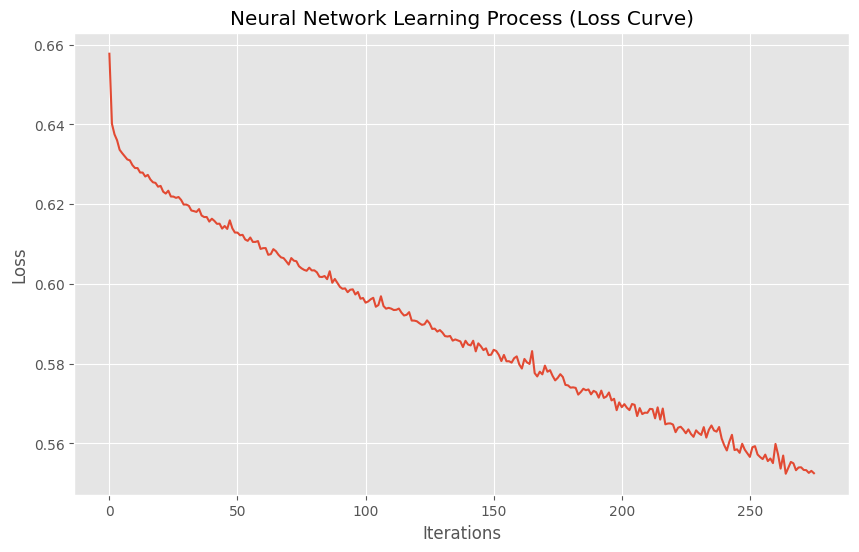

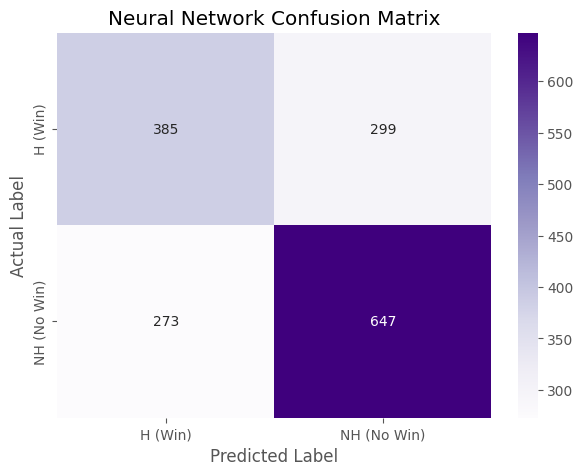

In [6]:
# 1. Visualize the Loss Curve
plt.figure(figsize=(10,6))
plt.plot(nn_model.loss_curve_)
plt.title('Neural Network Learning Process (Loss Curve)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# 2. Generate the 4-box Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['H (Win)', 'NH (No Win)'], 
            yticklabels=['H (Win)', 'NH (No Win)'])

plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [7]:
# Save the model and scaler
joblib.dump(nn_model, 'nn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Files 'nn_model.pkl' and 'scaler.pkl' saved in the models/ folder.")

Files 'nn_model.pkl' and 'scaler.pkl' saved in the models/ folder.
